### **Objective**

In this notebook, we will implement **multiclass MNIST digit recognition classifier** with **boosting** :

 * AdaBoost 

 * GradientBoosting

 * XGBoost



### **Importing basic libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from keras.datasets import mnist

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

from sklearn.pipeline import Pipeline

### **Loading MNIST dataset**

Begin by loading MNIST dataset with `load_data` function in `mnist` class.

We obtain:

* Training feature matrix and labels

* Test feature matrix and labels


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
data = mnist.load_data()

* There are 60000 examples in training set and 10000 examples in the test set.

* Each example is a grey scale image of size 28 X 28. 

* There are 10 different labels - one for each digit - 0 to 9.

In [3]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [4]:
# Normalizing
X_train = X_train / 255
X_test = X_test / 255

We use ShuffleSplit cross validation with 10 splits and 20% data set aside for model evaluation as a test data .

In [5]:
cv = ShuffleSplit(n_splits=10,test_size=0.2, random_state=42)

### **Model Building**

We define two functions :

In [6]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(
        estimator, X_train, y_train, cv=cv, scoring='f1_macro')

    print(
        f'On an average, {name} model has f1 score of 'f'{cv_train_score.mean():.3f} (+/-) {cv_train_score.std():.3f} on the training set')

In [7]:
def eval(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)

    print('Classification Report :')
    print(classification_report(y_test, y_pred))

    print('Confusion Matrix : ')
    sns.heatmap(confusion_matrix(y_test, y_pred),
                cmap='Greens', annot=True, cbar=True, fmt='.5g')
    # ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()


### **AdaBoost for MNIST multiclass classification** 

We instantiate a decision tree classifier with default parameters and train it. 

The `train_classifier` function prints the  means of cross validated accuracy and standard deviation of the trained classifier on the training set.

In [8]:
adb_pipeline = Pipeline([('classifier', AdaBoostClassifier())])

train_classifiers(adb_pipeline, X_train, y_train.ravel(),
                  cv, 'AdaBoostClassifier')


On an average, AdaBoostClassifier model has f1 score of 0.712 (+/-) 0.016 on the training set


Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       980
           1       0.85      0.94      0.90      1135
           2       0.79      0.58      0.67      1032
           3       0.68      0.67      0.68      1010
           4       0.72      0.72      0.72       982
           5       0.69      0.59      0.64       892
           6       0.72      0.86      0.78       958
           7       0.68      0.78      0.73      1028
           8       0.66      0.68      0.67       974
           9       0.62      0.55      0.58      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

Confusion Matrix : 


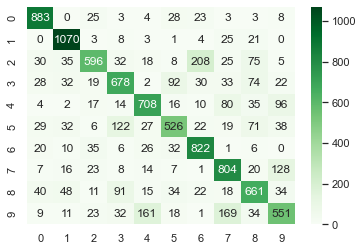

In [9]:
eval(adb_pipeline, X_test, y_test)

### **GradientBoostingClassifier for MNIST classification**

Let's instantiate a gradient boosting classifier object with default parameters and train it.

Observe the mean `f1_score` and its standard deviation obtained by the classifier based 10-fold cross validation of the training set.

In [10]:
grb_pipeline = Pipeline(
    [('classifier', GradientBoostingClassifier(n_estimators=10))])

train_classifiers(grb_pipeline, X_train, y_train.ravel(),
                  cv, 'GradientBoostingClassifier')

On an average, GradientBoostingClassifier model has f1 score of 0.835 (+/-) 0.003 on the training set


Let's evaluate the trained classifier on the test set.

Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       980
           1       0.89      0.95      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.81      0.84      0.83      1010
           4       0.79      0.85      0.82       982
           5       0.87      0.70      0.78       892
           6       0.93      0.85      0.89       958
           7       0.91      0.82      0.86      1028
           8       0.76      0.81      0.78       974
           9       0.75      0.83      0.79      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix : 


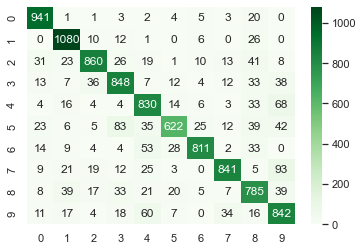

In [11]:
eval(grb_pipeline, X_test, y_test)

### **XGBoost Classifier for MNIST classification**

In [12]:
from xgboost import XGBClassifier

c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [13]:
xgbc_pipeline = Pipeline([("classifier",XGBClassifier())])

train_classifiers(xgbc_pipeline,X_train, y_train.ravel(), cv, 'GradientBoostingClassifier')

c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\faizan\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
On an average, GradientBoostingClassifier model has f1 score of 0.976 (+/-) 0.001 on the training set


Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix : 


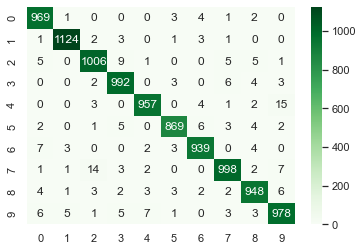

In [14]:
eval(xgbc_pipeline, X_test, y_test)

## **Summary** 

* We trained three multi-class classifiers for handwritten digit recognition.

* Firstly, the **AdaBoost classifier** obtained an accuracy of **71%** on the test set.

* Next ,using **Gradient boosting clssifier** gave us an increase of 12 percentage in the accuracy, which translates to **83%** accuracy on the test set.

* Finally, the **XGBoost classifier** pushed that further to **97%**.

* We can see that how ensemble techniques give better results on the classification task compared to a single classifier.